In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn import tree
from sklearn import datasets, linear_model
import graphviz
import matplotlib.pyplot as plt
import math


In [2]:
carseats = pd.read_csv('Dataset/Carseats.csv')

In [3]:
carseats['High'] = carseats.Sales.map(lambda x: 'Y' if x>8 else 'N')
carseats.ShelveLoc = pd.factorize(carseats.ShelveLoc)[0]
carseats.Urban = carseats.Urban.map({'No':0, 'Yes':1})
carseats.US = carseats.US.map({'No':0, 'Yes':1})
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
Unnamed: 0     400 non-null int64
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null int64
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null int64
US             400 non-null int64
High           400 non-null object
dtypes: float64(1), int64(11), object(1)
memory usage: 40.7+ KB


In [4]:
X = carseats.drop(['Sales', 'High'], axis=1)
y = carseats.High
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=200, random_state=0)

C:\Users\ida_s\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=6, min_samples_leaf=4)
clf_gini.fit(X_train, y_train)
print(clf_gini.score(X_train, y_train))

0.9


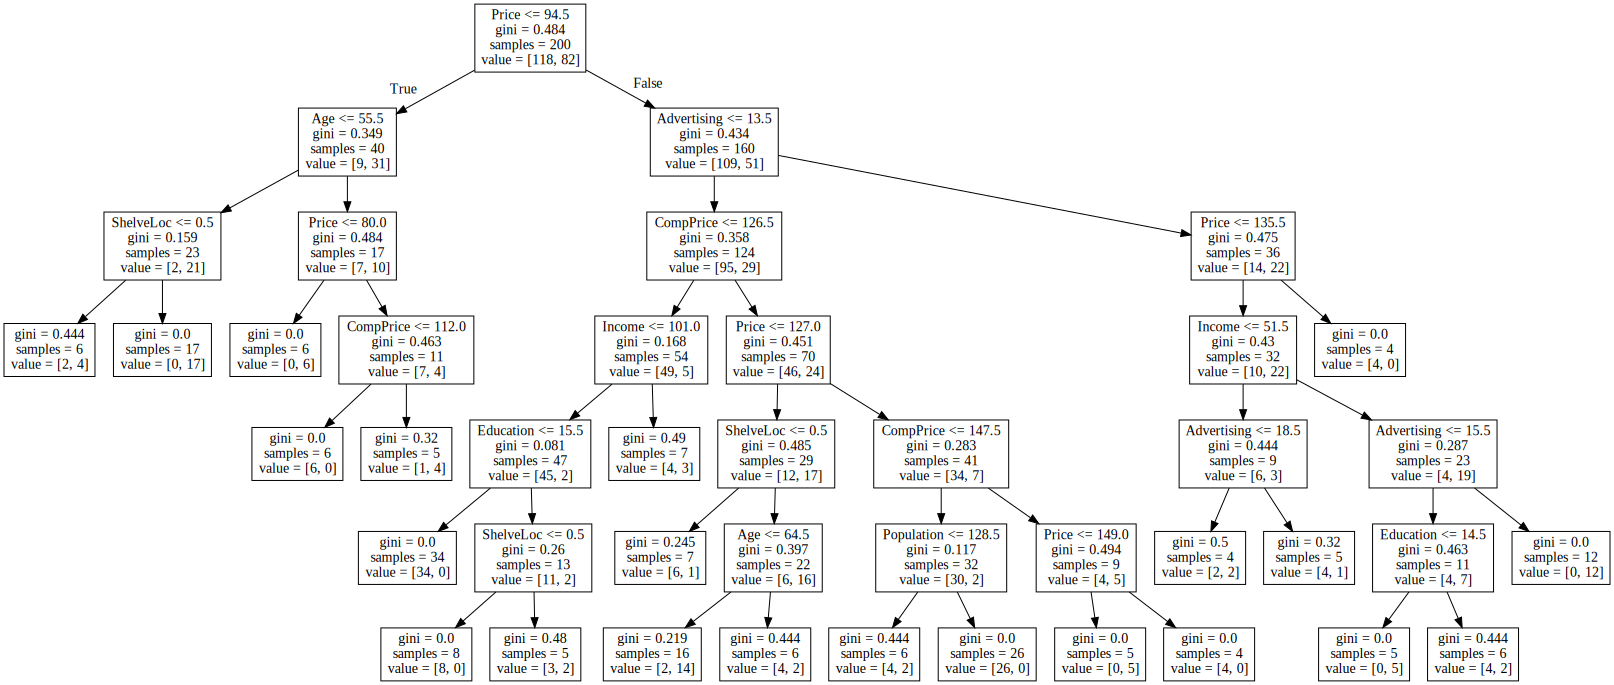

In [6]:
export_graphviz(clf_gini, out_file="831Tree.dot", feature_names=X_train.columns)
with open("831Tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [8]:
y_pred = clf_gini.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm


,No,Yes
No,99,32
Yes,19,50


In [9]:
print('Accuracy is ', accuracy_score(y_test,y_pred)*100)

Accuracy is  74.5
